<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = "/content/cifar-10.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Done extracting the file")

Done extracting the file


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
!pip install py7zr

In [ ]:
import py7zr
archive = py7zr.SevenZipFile("/content/train.7z", mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
import numpy as np
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir("/content/train")
print(type(filenames))
print(len(filenames))

<class 'list'>
50000


In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['36397.png', '246.png', '7081.png', '5260.png', '19602.png']
['12173.png', '6259.png', '46901.png', '35055.png', '28477.png']


**Label Processing**

In [ ]:
labels_df = pd.read_csv("/content/trainLabels.csv")

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.value_counts()

id     label     
50000  automobile    1
1      frog          1
2      truck         1
3      truck         1
4      deer          1
                    ..
20     frog          1
21     deer          1
22     cat           1
23     frog          1
24     frog          1
Name: count, Length: 50000, dtype: int64

In [ ]:
labels_df[labels_df['id'] == 41336]

,id,label
41335,41336,ship


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_dictionary = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


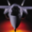

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/train/16003.png")
cv2_imshow(image)

In [ ]:
labels_df[labels_df['id'] == 16003]

,id,label
16002,16003,airplane


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# Converting images to numpy arrays
train_data_folder = "/content/train/"
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + ".png")
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
print(data[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
# Converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

**Building the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# Setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Training the Neural Network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9533 - acc: 0.3023 - val_loss: 1.8569 - val_acc: 0.3220
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7957 - acc: 0.3607 - val_loss: 1.7399 - val_acc: 0.3750
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7361 - acc: 0.3798 - val_loss: 1.7794 - val_acc: 0.3675
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7004 - acc: 0.3960 - val_loss: 1.6749 - val_acc: 0.4035
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.6795 - acc: 0.4016 - val_loss: 1.6367 - val_acc: 0.4115
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6591 - acc: 0.4082 - val_loss: 1.6685 - val_acc: 0.4075
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6418 - acc: 0.4171 - val_loss: 1.6670 - val_acc: 0.4058
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
# weights = imagenet (has 14 millions images), include_top=False (bcoz ResNet50 contains 1000s of classes
# but we have only 10 classes, so False is used so that we use our own output column) and 256 x 256 is
# the dimension in which the ResNet50 takes images for training
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = models.Sequential()
# ResNet50 model takes images in 256x256 dimension so to make our images of that dimension we used
# layers.upsampling 3 times so that 2x2x2 becomes 8 times and 32x8=256.
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 480s 392ms/step - loss: 1.6597 - acc: 0.4487 - val_loss: 0.9334 - val_acc: 0.7465
Epoch 2/10
1125/1125 [==============================] - 430s 382ms/step - loss: 1.0010 - acc: 0.7049 - val_loss: 0.4876 - val_acc: 0.8938
Epoch 3/10
1125/1125 [==============================] - 436s 388ms/step - loss: 0.7377 - acc: 0.8134 - val_loss: 0.3565 - val_acc: 0.9258
Epoch 4/10
1125/1125 [==============================] - 429s 381ms/step - loss: 0.5626 - acc: 0.8703 - val_loss: 0.2886 - val_acc: 0.9315
Epoch 5/10
1125/1125 [==============================] - 437s 388ms/step - loss: 0.4492 - acc: 0.9083 - val_loss: 0.2552 - val_acc: 0.9388
Epoch 6/10
1125/1125 [==============================] - 430s 382ms/step - loss: 0.3528 - acc: 0.9347 - val_loss: 0.2315 - val_acc: 0.9433
Epoch 7/10
1125/1125 [==============================] - 436s 388ms/step - loss: 0.2777 - acc: 0.9544 - val_loss: 0.2239 - val_acc: 0.9402
Epoch 8/10
1125/1125 [============

In [ ]:
h = history

# Plotting the loss value
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plotting the accuarcy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()